# **Car Price Prediction**

![unemployment_pic](https://ideogram.ai/api/images/direct/c8bOilACShSjEcd4eg7bcA.pnghttps://ideogram.ai/api/images/direct/c8bOilACShSjEcd4eg7bcA.pTransmissionng)


## **1.0 About the Author**

- **Project:**  Car Price Prediction
- **Author:** Noor Muhammad
- **Author's Contact Info:**

  [![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/NoorMuhammad106)

  [![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/noormuhammad106)

  [![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](www.linkedin.com/in/noormuhammad106)

  [![Gmail](https://img.shields.io/badge/Gmail-Contact%20Me-red?style=for-the-badge&logo=gmail)](noormuhammadd106@gmail.com)

# Car Price Prediction Project Notebook

## Project Overview:

Car price prediction is a significant area of research in machine learning, aiming to forecast the price of a car based on various factors such as brand goodwill, car features, horsepower, mileage, and more. This project focuses on developing a machine learning model to accurately predict car prices using relevant features.

## Dataset:

The dataset used in this project contains information on various attributes of cars, including brand, features, horsepower, mileage, and corresponding prices. It is sourced from reputable car market databases and has been preprocessed to ensure data quality and consistency.

### Dataset Columns:

1. **Brand Goodwill**: The reputation and goodwill associated with the brand of the car.
2. **Car Features**: The features and specifications of the car, such as engine type, transmission, fuel type, etc.
3. **Horsepower**: The power generated by the car's engine, measured in horsepower (HP).
4. **Mileage**: The distance traveled by the car per unit of fuel consumption, typically measured in miles per gallon (MPG).
5. **Car Price**: The target variable representing the price of the car.

## Project Goals:

- Build a machine learning model capable of predicting car prices with high accuracy.
- Identify the key features that significantly influence car prices.
- Evaluate the performance of the model using appropriate metrics and techniques.

## Methodology:

1. Data Preprocessing: Clean the dataset, handle missing values, and perform feature engineering to extract relevant features.
2. Exploratory Data Analysis (EDA): Analyze the relationships between different features and the target variable (car prices) to gain insights into the data.
3. Model Development: Train and evaluate various machine learning models, such as linear regression, decision trees, random forests, and gradient boosting, to predict car prices.
4. Model Evaluation: Assess the performance of each model using metrics such as mean absolute error (MAE), mean squared error (MSE), and R-squared score.
5. Hyperparameter Tuning: Fine-tune the hyperparameters of the best-performing model to improve its predictive performance further.

## Metadata:

- **Author**: [Your Name]
- **Date Created**: [Date]
- **Last Updated**: [Date]
- **Programming Language**: Python
- **Libraries Used**:
    - NumPy
    - Pandas
    - Matplotlib
    - Seaborn
    - Plotly Express
- **Dataset Source**: [Provide source if applicable]
- **License**: [Specify if dataset or code is under any particular license]
- **GitHub Repository**: [Link to the project repository]

## Conclusion:

This project aims to demonstrate the effectiveness of machine learning techniques in predicting car prices accurately. By leveraging advanced algorithms and thorough data analysis, we aim to provide insights into the factors influencing car prices and develop a reliable predictive model.


In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv('car data.csv')

In [31]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [32]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [34]:
# Check Missing Values
print('Missing Values:')
df.isnull().sum()

Missing Values:


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

-  So we have no null values ,we are ready to go.

In [35]:
# check for duplicate values
print('Duplicate Values:')
df.duplicated().sum()

Duplicate Values:


2

In [36]:
# drop duplicate values
df = df.drop_duplicates()
df.duplicated().sum()

0

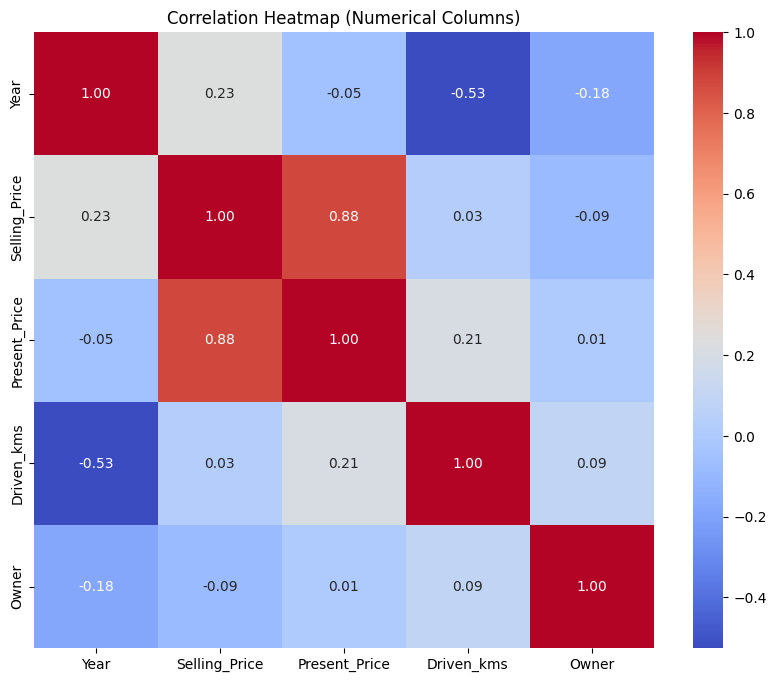

In [37]:
# Select numerical columns
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

# Create a DataFrame containing only the numerical columns
numerical_df = df[numerical_columns]

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

### Distribution of plot

<Figure size 1000x600 with 0 Axes>

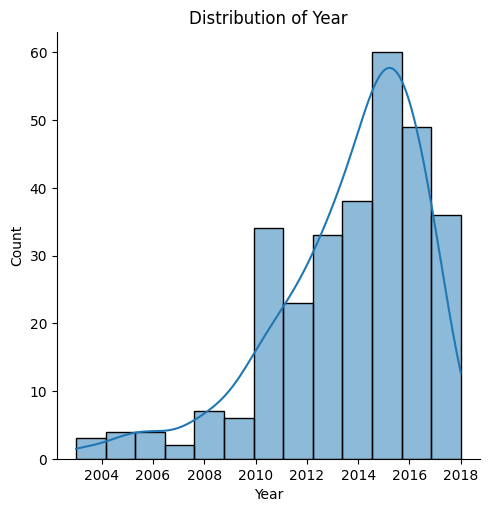

<Figure size 1000x600 with 0 Axes>

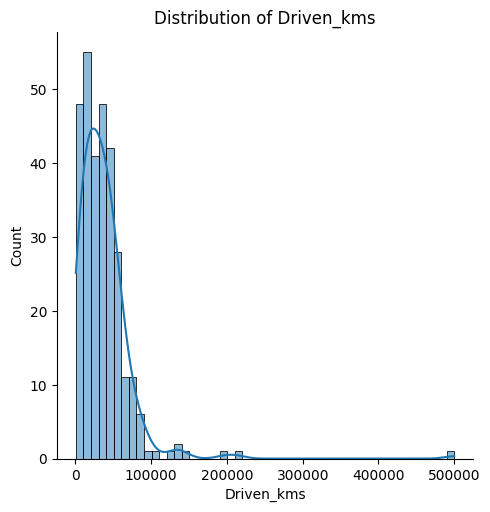

<Figure size 1000x600 with 0 Axes>

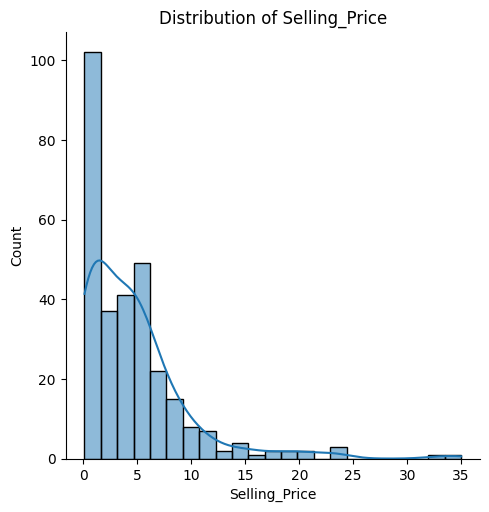

<Figure size 1000x600 with 0 Axes>

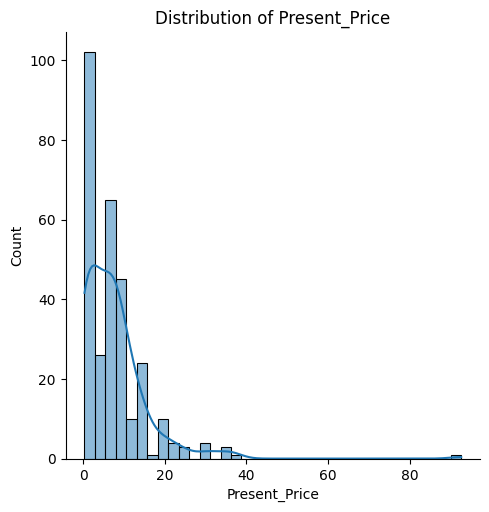

In [38]:
numerical_features = ['Year', 'Driven_kms', 'Selling_Price', 'Present_Price']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.displot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

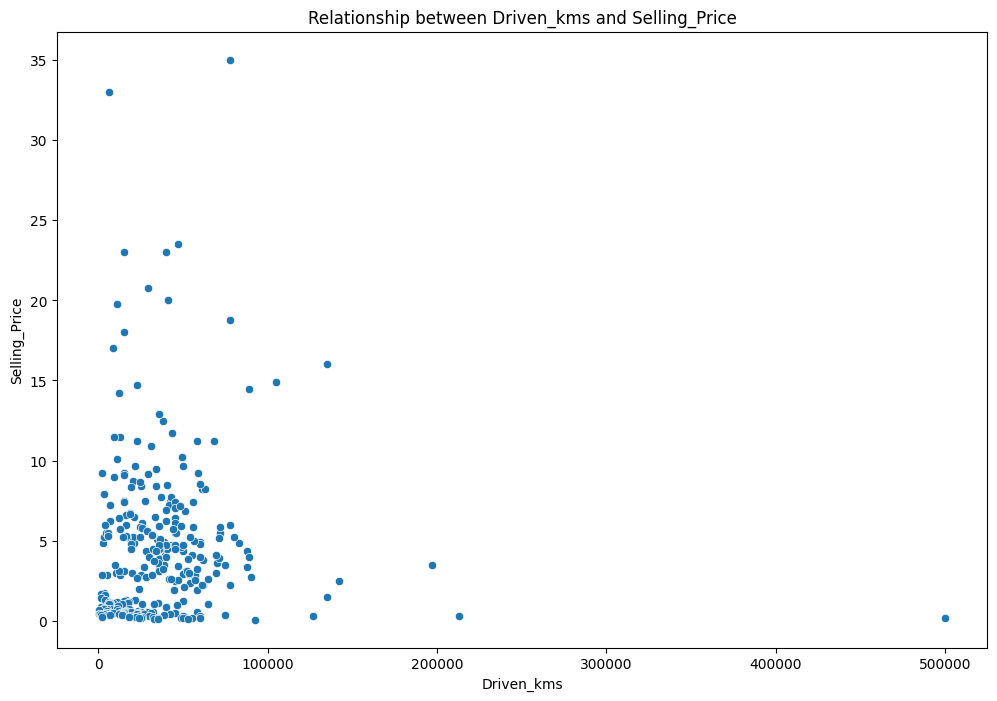

In [39]:
# Scatter plots
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title('Relationship between Driven_kms and Selling_Price')
plt.show()

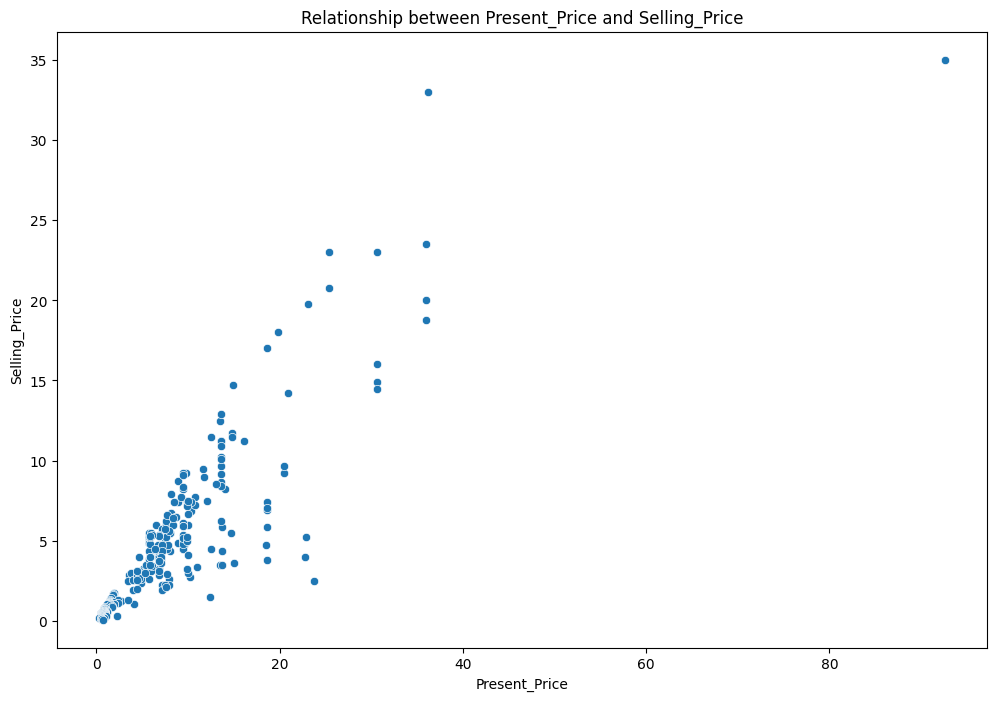

In [40]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Relationship between Present_Price and Selling_Price')
plt.show()

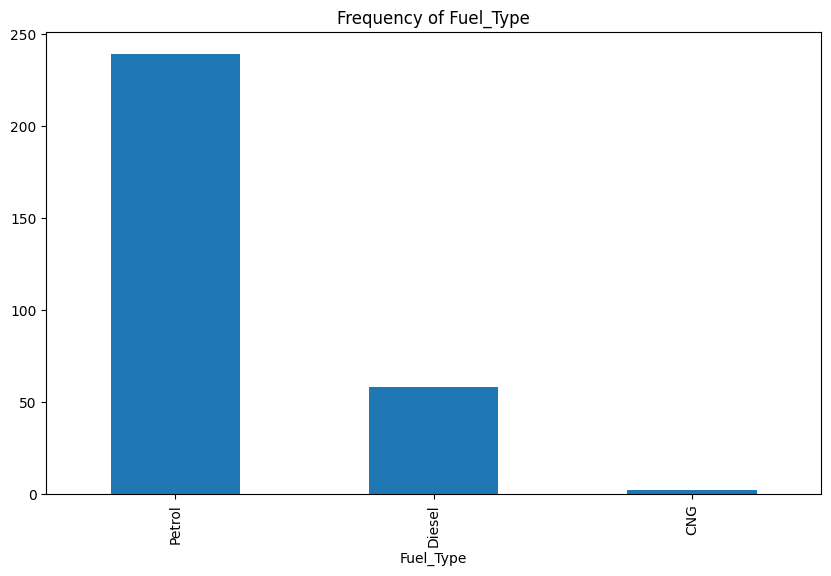

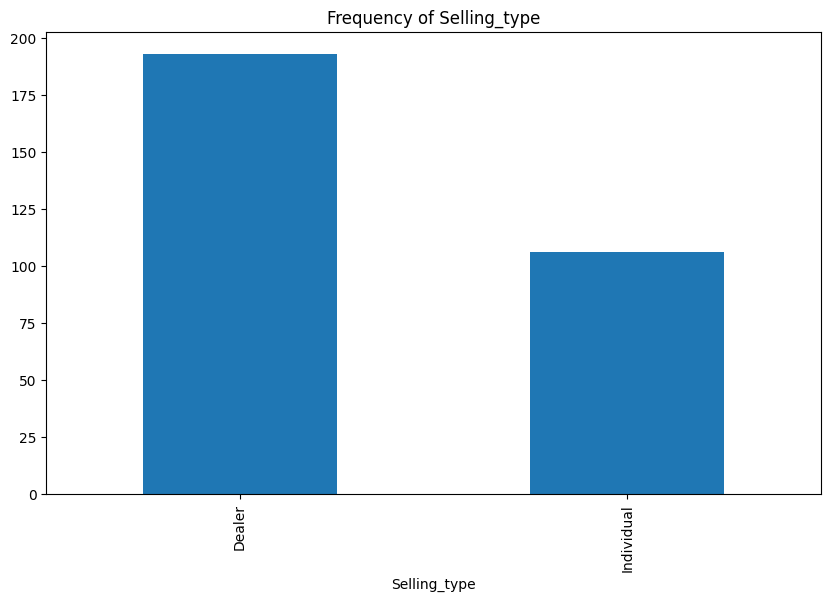

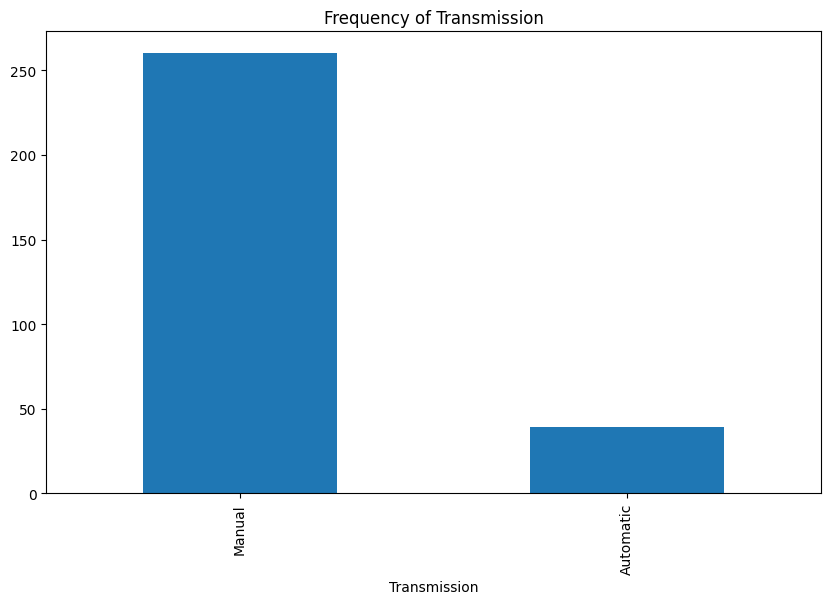

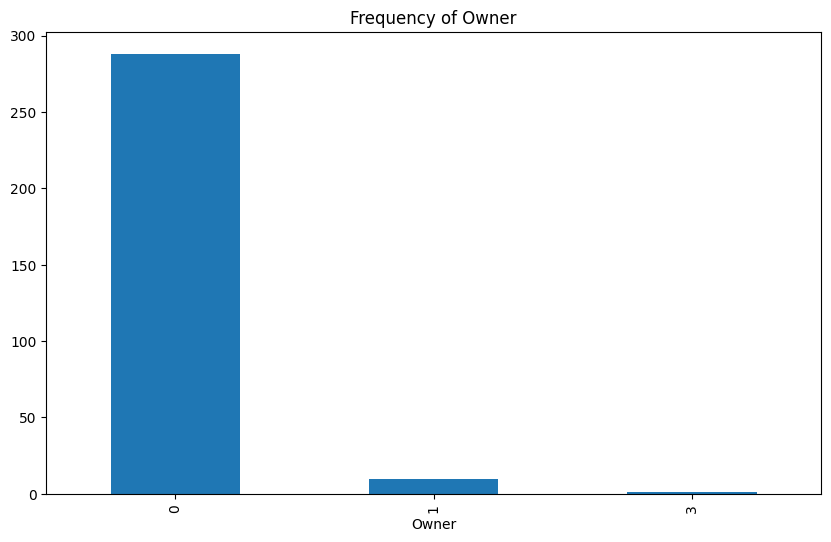

In [41]:
# Categorical features
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {feature}')
    plt.show()

<Figure size 1200x800 with 0 Axes>

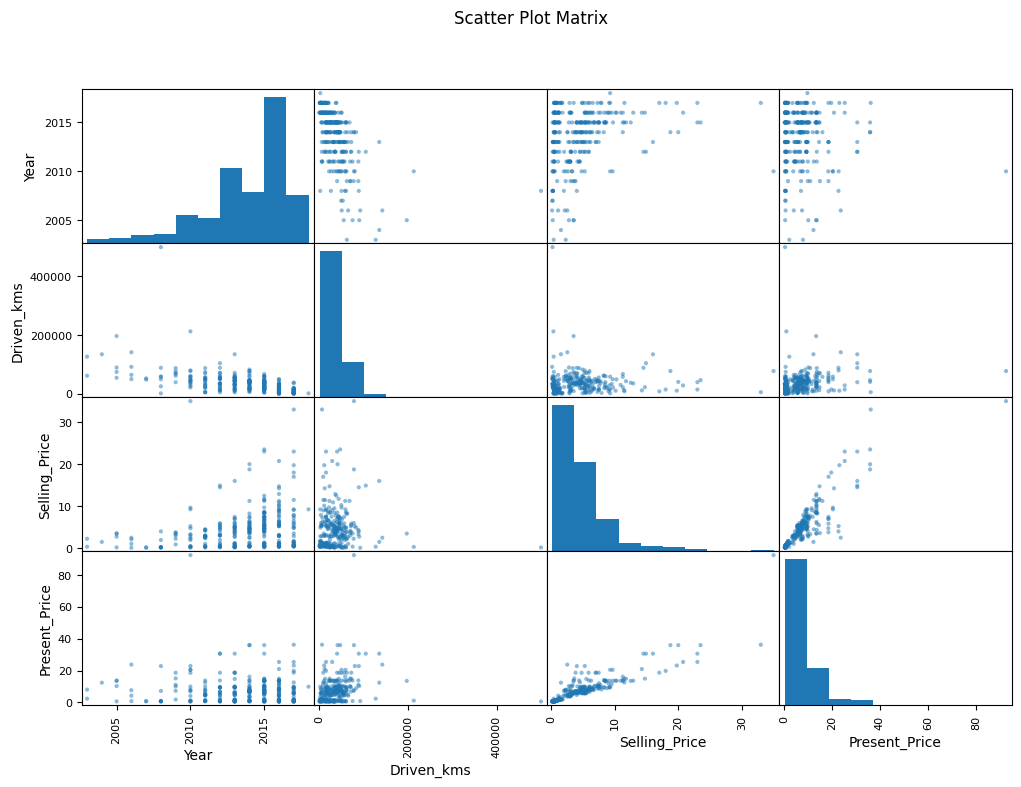

In [42]:
# Scatter plot matrix
plt.figure(figsize=(12, 8))
pd.plotting.scatter_matrix(df[numerical_features], figsize=(12, 8))
plt.suptitle('Scatter Plot Matrix')
plt.show()

In [43]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

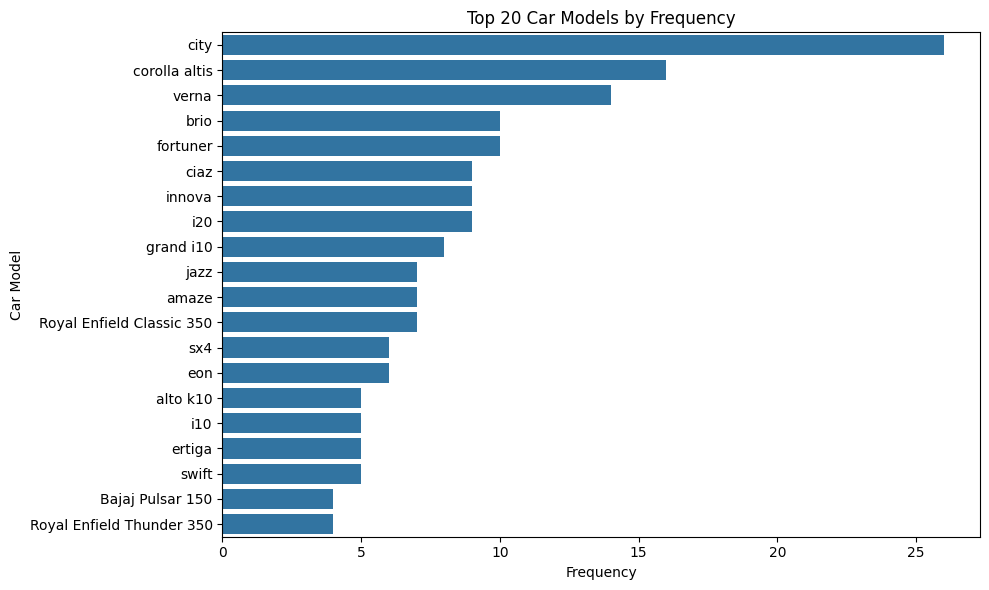

In [44]:
n = 20  # Number of top car models to plot
top_car_models = df['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

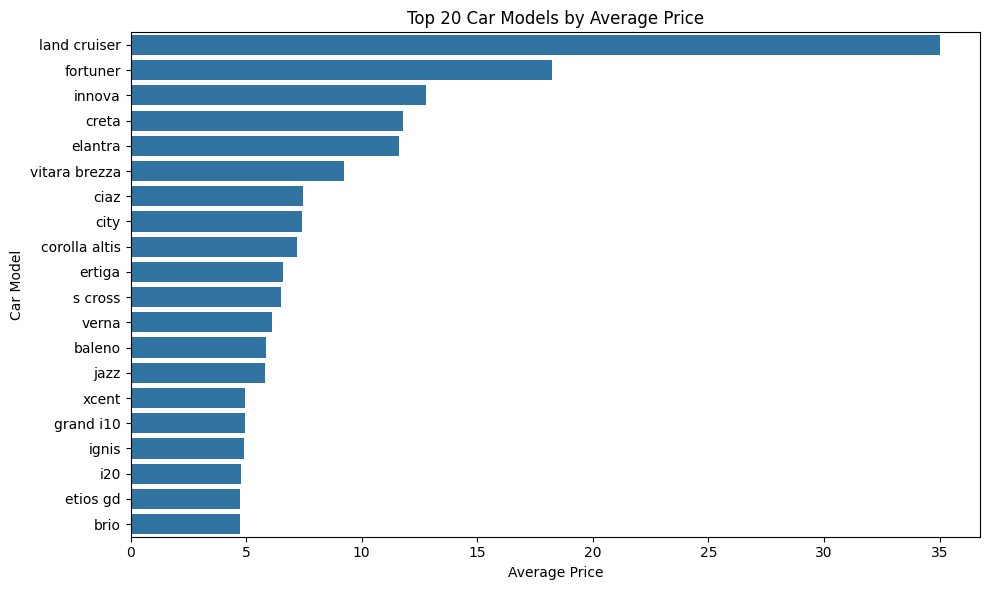

In [45]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

### Data Cleaning and Transforming the data

In [46]:
print(df['Fuel_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64


In [47]:
print(df['Selling_type'].value_counts())

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64


In [48]:
print(df['Transmission'].value_counts())

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


## Encode categorical features

In [49]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [50]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [51]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [52]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [53]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [56]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 6.675444100493426
R-squared: 0.7409934356413088


In [60]:
# Make predictions
new_car = [[2022, 20000, 0, 1, 1, 0, 0]]  # Example new car data
predicted_price = model.predict(new_car)
print('Predicted Selling Price:', predicted_price[0])

Predicted Selling Price: 8829.493382502464
